# Crop Recommendation System - Data Exploration
## CS316: Introduction to AI and Data Science

**Project Phase 2 - Week 1**  
**Date:** October 2025

### Notebook Overview

This notebook performs comprehensive exploratory data analysis (EDA) on the Crop Recommendation Dataset. We will:

1. Load and inspect the dataset
2. Check data quality (missing values, duplicates)
3. Analyze feature distributions and statistics
4. Visualize relationships between variables
5. Identify patterns and insights for model building

**Dataset Source:** [Kaggle - Crop Recommendation Dataset](https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset)

**Complete Data Exploration Report:**[Google Document Report](https://docs.google.com/document/d/1JgRRkWppcerf-53bgQMkoRYI0CVWU83J/edit?usp=sharing&ouid=114598965992781677318&rtpof=true&sd=true)

## 1. Import Required Libraries

We'll use standard data science libraries for analysis and visualization.

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# File and folder management
import os

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For better plot styling
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

print("All libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

All libraries imported successfully!
Pandas version: 2.0.3
NumPy version: 1.24.3


## 2. Load the Dataset

**Note:** We downloaded the `crop_recommendation.csv` file from Kaggle and placed it in the same directory.

**Dataset Description:**
- **Size:** 2,200 samples
- **Features:** 7 input features + 1 target variable
- **Purpose:** Predict the most suitable crop based on soil and environmental conditions

In [2]:
# Load the dataset
df = pd.read_csv('crop_recommendation.csv')

print("Dataset loaded successfully!")
print(f"\nDataset shape: {df.shape[0]} rows x {df.shape[1]} columns")

Dataset loaded successfully!

Dataset shape: 2200 rows x 8 columns


## 3. Initial Data Inspection

Let's take our first look at the data to understand its structure.

### 3.1 First Few Rows

The `.head()` method shows the first 5 rows of our dataset.

In [3]:
# Display first 5 rows
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.88,82.00,6.50,202.94,rice
1,85,58,41,21.77,80.32,7.04,226.66,rice
2,60,55,44,23.00,82.32,7.84,263.96,rice
3,74,35,40,26.49,80.16,6.98,242.86,rice
4,78,42,42,20.13,81.60,7.63,262.72,rice


### 3.2 Last Few Rows

Let's also check the last few rows to ensure data consistency.

In [4]:
# Display last 5 rows
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.77,66.41,6.78,177.77,coffee
2196,99,15,27,27.42,56.64,6.09,127.92,coffee
2197,118,33,30,24.13,67.23,6.36,173.32,coffee
2198,117,32,34,26.27,52.13,6.76,127.18,coffee
2199,104,18,30,23.60,60.40,6.78,140.94,coffee


### 3.3 Dataset Information

The `.info()` method provides:
- Column names and data types
- Number of non-null entries
- Memory usage

In [5]:
# Get dataset information
print("-"*60)
print("Dataset Infomation")
print("-"*60)
df.info()

------------------------------------------------------------
Dataset Infomation
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


### 3.4 Column Names and Data Types

In [6]:
# Display columns with their data types
print("\nColumn Names and Data Types:")
print("-" * 40)
for col, dtype in df.dtypes.items():
    print(f"{col:15} : {dtype}")


Column Names and Data Types:
----------------------------------------
N               : int64
P               : int64
K               : int64
temperature     : float64
humidity        : float64
ph              : float64
rainfall        : float64
label           : object


## 4. Statistical Summary

The `.describe()` method provides descriptive statistics for numerical features.

In [7]:
# Generate statistical summary
print("-"*67)
print("Statistical Summary for Numeric values")
print("-"*67)
df.describe().round(2)

-------------------------------------------------------------------
Statistical Summary for Numeric values
-------------------------------------------------------------------


,N,P,K,temperature,humidity,ph,rainfall
count,2200.00,2200.00,2200.00,2200.00,2200.00,2200.00,2200.00
mean,50.55,53.36,48.15,25.62,71.48,6.47,103.46
std,36.92,32.99,50.65,5.06,22.26,0.77,54.96
min,0.00,5.00,5.00,8.83,14.26,3.50,20.21
25%,21.00,28.00,20.00,22.77,60.26,5.97,64.55
50%,37.00,51.00,32.00,25.60,80.47,6.43,94.87
75%,84.25,68.00,49.00,28.56,89.95,6.92,124.27
max,140.00,145.00,205.00,43.68,99.98,9.94,298.56


### 4.1 Key Observations from Statistics

Let's analyze the ranges and distributions:

In [8]:
# Calculate additional statistics
print("\nDetailed Feature Statistcis\n")
print("-"*70)

numerical_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

for feature in numerical_features:
    print(f"\n{feature.upper()}:")
    print(f"  Range: [{df[feature].min():.2f}, {df[feature].max():.2f}]")
    print(f"  Mean: {df[feature].mean():.2f}")
    print(f"  Median: {df[feature].median():.2f}")
    print(f"  Std Dev: {df[feature].std():.2f}")


Detailed Feature Statistcis

----------------------------------------------------------------------

N:
  Range: [0.00, 140.00]
  Mean: 50.55
  Median: 37.00
  Std Dev: 36.92

P:
  Range: [5.00, 145.00]
  Mean: 53.36
  Median: 51.00
  Std Dev: 32.99

K:
  Range: [5.00, 205.00]
  Mean: 48.15
  Median: 32.00
  Std Dev: 50.65

TEMPERATURE:
  Range: [8.83, 43.68]
  Mean: 25.62
  Median: 25.60
  Std Dev: 5.06

HUMIDITY:
  Range: [14.26, 99.98]
  Mean: 71.48
  Median: 80.47
  Std Dev: 22.26

PH:
  Range: [3.50, 9.94]
  Mean: 6.47
  Median: 6.43
  Std Dev: 0.77

RAINFALL:
  Range: [20.21, 298.56]
  Mean: 103.46
  Median: 94.87
  Std Dev: 54.96


## 5. Data Quality Assessment

Before building models, we need to ensure data quality by checking for:
- Missing values
- Duplicate rows
- Data inconsistencies

### 5.1 Missing Values Check

In [9]:
# Check for missing values
print("-"*60)
print("Missing Value Checks")
print("-"*60)

missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Percentage': missing_percentage.values
})

print(missing_df.to_string(index=False))

if df.isnull().sum().sum() == 0:
    print("\nNo missing values found in the dataset.")
else:
    print(f"\nWarning: Found {df.isnull().sum().sum()} missing values.")

------------------------------------------------------------
Missing Value Checks
------------------------------------------------------------
     Column  Missing Count  Percentage
          N              0         0.0
          P              0         0.0
          K              0         0.0
temperature              0         0.0
   humidity              0         0.0
         ph              0         0.0
   rainfall              0         0.0
      label              0         0.0

No missing values found in the dataset.


### 5.2 Duplicate Rows Check

In [10]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()

print("-"*60)
print("Duplicate Row Checks")
print("-"*60)
print(f"Number of duplicate rows: {duplicate_count}")
print(f"Percentage of duplicates: {(duplicate_count/len(df)*100):.2f}%")

if duplicate_count == 0:
    print("\nNo duplicate rows found.")
else:
    print(f"\nWarning: Found {duplicate_count} duplicate rows.")
    print("\nFirst 5 duplicate rows:")
    print(df[df.duplicated()].head())

------------------------------------------------------------
Duplicate Row Checks
------------------------------------------------------------
Number of duplicate rows: 0
Percentage of duplicates: 0.00%

No duplicate rows found.


### 5.3 Target Variable Analysis

Let's examine our target variable which is crop labels in this case to understand class distribution.

In [11]:
# Analyze target variable
print("-"*60)
print("Target Variable analysis")
print("-"*60)

print(f"\nTarget Column: 'label' (Crop Type)")
print(f"Number of unique crops: {df['label'].nunique()}")
print(f"\nAll crop types:")
print(df['label'].unique())

print("\n" + "-"*60)
print("Crop Distribution")
print("-"*60)
crop_counts = df['label'].value_counts().sort_index()
print(crop_counts)

print(f"\nClass Balance Check:")
if crop_counts.std() < 1:
    print("Balanced. Each crop has exactly the same number of samples.")
else:
    print(f"Classes are imbalanced (std dev: {crop_counts.std():.2f})")

------------------------------------------------------------
Target Variable analysis
------------------------------------------------------------

Target Column: 'label' (Crop Type)
Number of unique crops: 22

All crop types:
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']

------------------------------------------------------------
Crop Distribution
------------------------------------------------------------
label
apple          100
banana         100
blackgram      100
chickpea       100
coconut        100
coffee         100
cotton         100
grapes         100
jute           100
kidneybeans    100
lentil         100
maize          100
mango          100
mothbeans      100
mungbean       100
muskmelon      100
orange         100
papaya         100
pigeonpeas     100
pomegranate    100
rice           100

## 6. Data Visualization

Visual analysis helps us understand patterns and relationships in the data.

### 6.1 Target Variable Distribution

Let's visualize how many samples we have for each crop.

### 6.2 Feature Distributions

Understanding how each feature is distributed helps identify patterns and outliers.

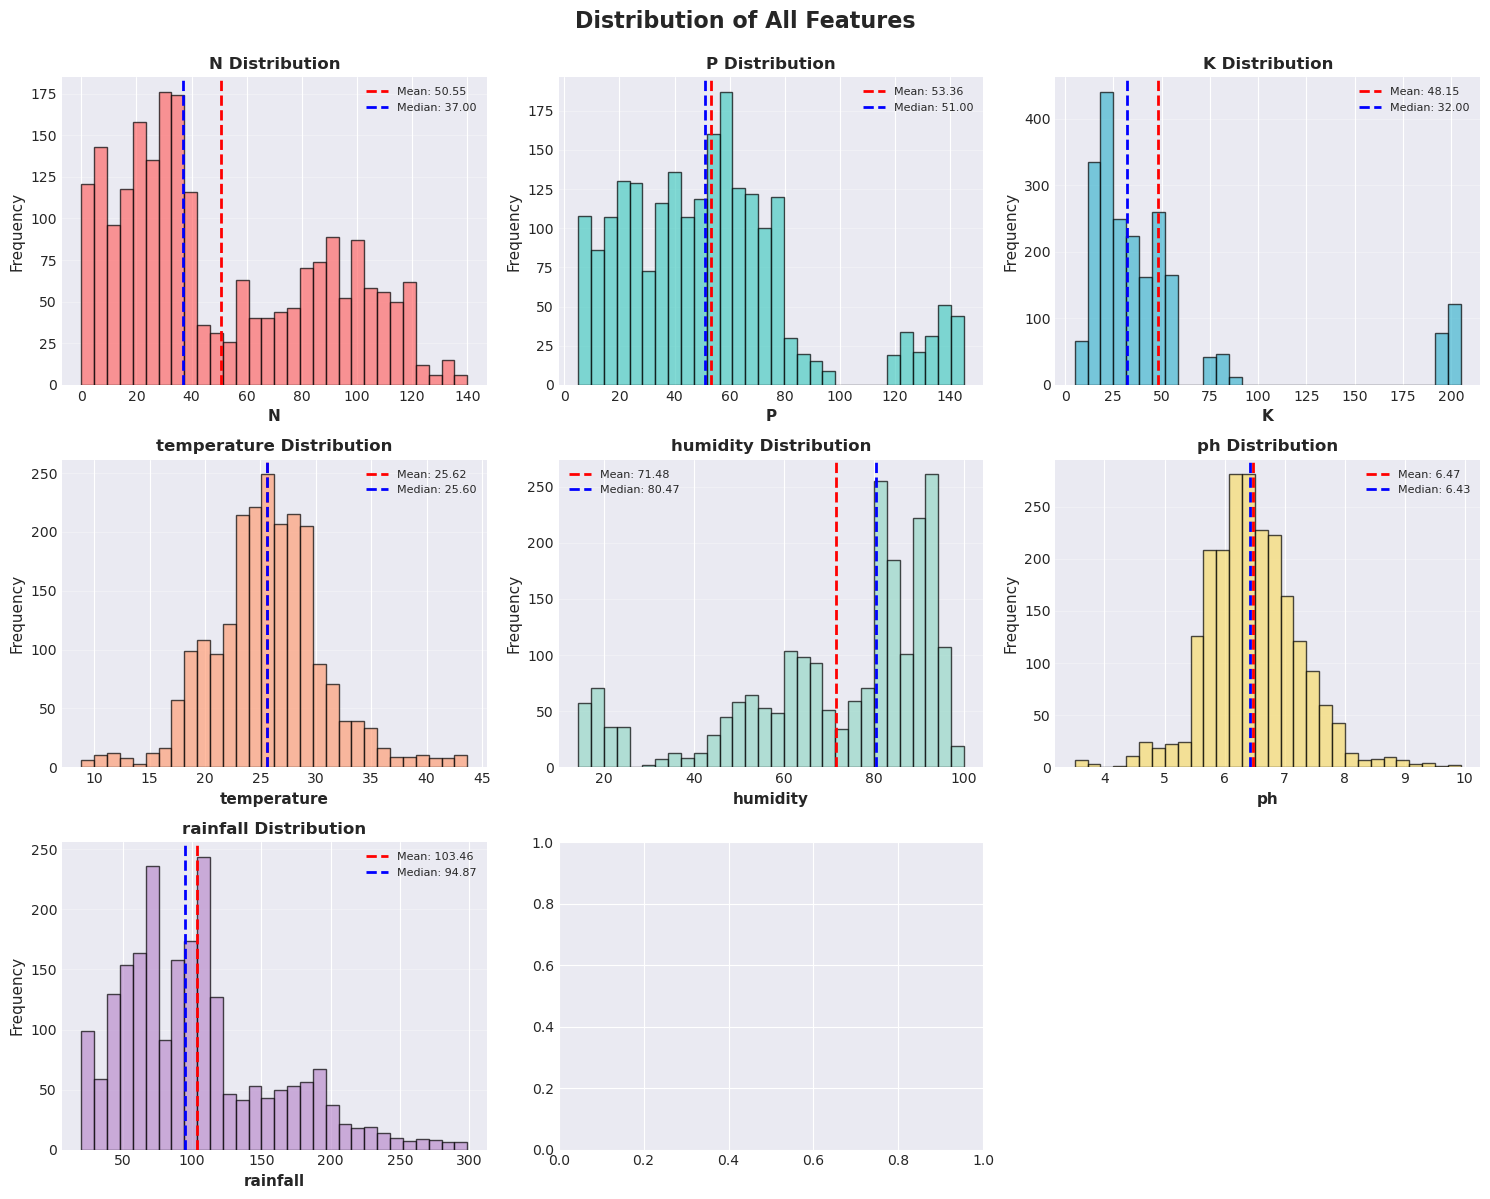

Visualization saved as 'images/feature_distributions.png'


In [12]:
# Plot distributions for all numerical features
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Distribution of All Features', fontsize=16, fontweight='bold', y=0.995)

features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F', '#BB8FCE']

for idx, feature in enumerate(features):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    # Histogram with KDE
    ax.hist(df[feature], bins=30, color=colors[idx], alpha=0.7, edgecolor='black')
    ax.set_xlabel(feature, fontsize=11, fontweight='bold')
    ax.set_ylabel('Frequency', fontsize=11)
    ax.set_title(f'{feature} Distribution', fontsize=12, fontweight='bold')
    ax.grid(axis='y', alpha=0.3)
    
    # Add statistics as text
    mean_val = df[feature].mean()
    median_val = df[feature].median()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, color='blue', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    ax.legend(fontsize=8)

# Remove empty subplot
axes[2, 2].remove()

plt.tight_layout()
plt.savefig('images/feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("Visualization saved as 'images/feature_distributions.png'")

### 6.3 Box Plots for Outlier Detection

Box plots help identify outliers and understand the spread of data.

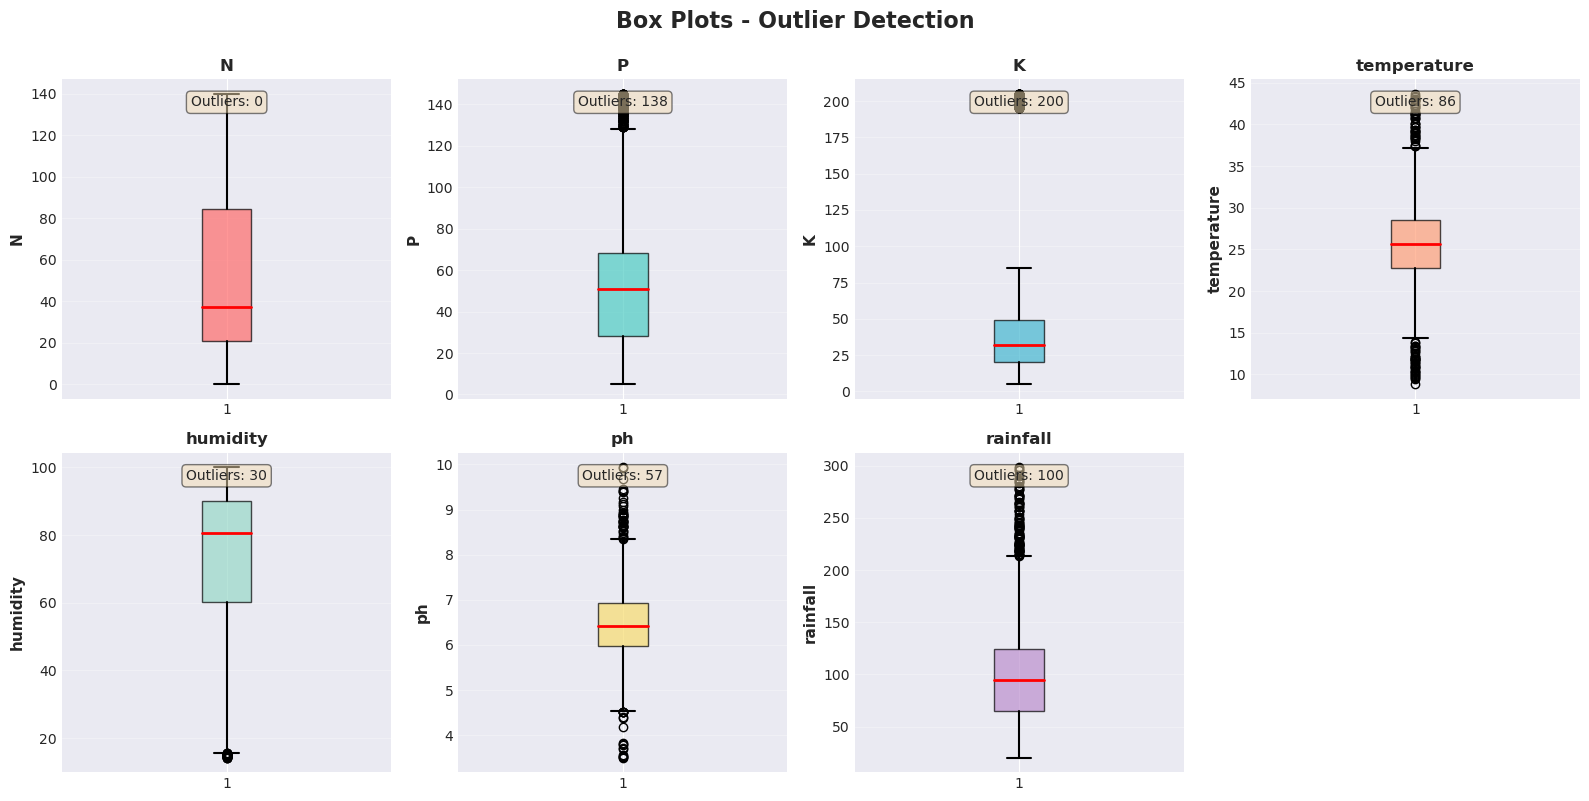

Visualization saved as 'images/boxplots_outliers.png'


In [13]:
# Create box plots for outlier detection
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Box Plots - Outlier Detection', fontsize=16, fontweight='bold', y=0.995)

for idx, feature in enumerate(features):
    row = idx // 4
    col = idx % 4
    ax = axes[row, col]
    
    # Create box plot
    bp = ax.boxplot(df[feature], patch_artist=True, 
                     boxprops=dict(facecolor=colors[idx], alpha=0.7),
                     medianprops=dict(color='red', linewidth=2),
                     whiskerprops=dict(color='black', linewidth=1.5),
                     capprops=dict(color='black', linewidth=1.5))
    
    ax.set_ylabel(feature, fontsize=11, fontweight='bold')
    ax.set_title(f'{feature}', fontsize=12, fontweight='bold')
    ax.grid(axis='y', alpha=0.3)
    
    # Calculate and display outlier count
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[feature] < Q1 - 1.5*IQR) | (df[feature] > Q3 + 1.5*IQR)][feature]
    
    ax.text(0.5, 0.95, f'Outliers: {len(outliers)}', 
            transform=ax.transAxes, ha='center', va='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Remove empty subplot
axes[1, 3].remove()

plt.tight_layout()
plt.savefig('images/boxplots_outliers.png', dpi=300, bbox_inches='tight')
plt.show()

print("Visualization saved as 'images/boxplots_outliers.png'")

### 6.4 Correlation Analysis

Correlation shows how features relate to each other. High correlation might indicate redundancy.

In [14]:
# Calculate correlation matrix
correlation_matrix = df[features].corr()

# Display correlation matrix
print("-"*60)
print("Correlation Matrix")
print("-"*60)
print(correlation_matrix.round(3))

# Identify highly correlated pairs
print("\n" + "-"*60)
print("Highly highly correlated pairs (|correlation| > 0.5)")
print("-"*60)

high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            high_corr_pairs.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })

if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs)
    print(high_corr_df.to_string(index=False))
else:
    print("No feature pairs with correlation > 0.5 found.")

------------------------------------------------------------
Correlation Matrix
------------------------------------------------------------
                N     P     K  temperature  humidity        ph  rainfall
N            1.00 -0.23 -0.14         0.03  1.91e-01  9.70e-02      0.06
P           -0.23  1.00  0.74        -0.13 -1.19e-01 -1.38e-01     -0.06
K           -0.14  0.74  1.00        -0.16  1.91e-01 -1.70e-01     -0.05
temperature  0.03 -0.13 -0.16         1.00  2.05e-01 -1.80e-02     -0.03
humidity     0.19 -0.12  0.19         0.20  1.00e+00 -8.00e-03      0.09
ph           0.10 -0.14 -0.17        -0.02 -8.00e-03  1.00e+00     -0.11
rainfall     0.06 -0.06 -0.05        -0.03  9.40e-02 -1.09e-01      1.00

------------------------------------------------------------
Highly highly correlated pairs (|correlation| > 0.5)
------------------------------------------------------------
Feature 1 Feature 2  Correlation
        P         K         0.74


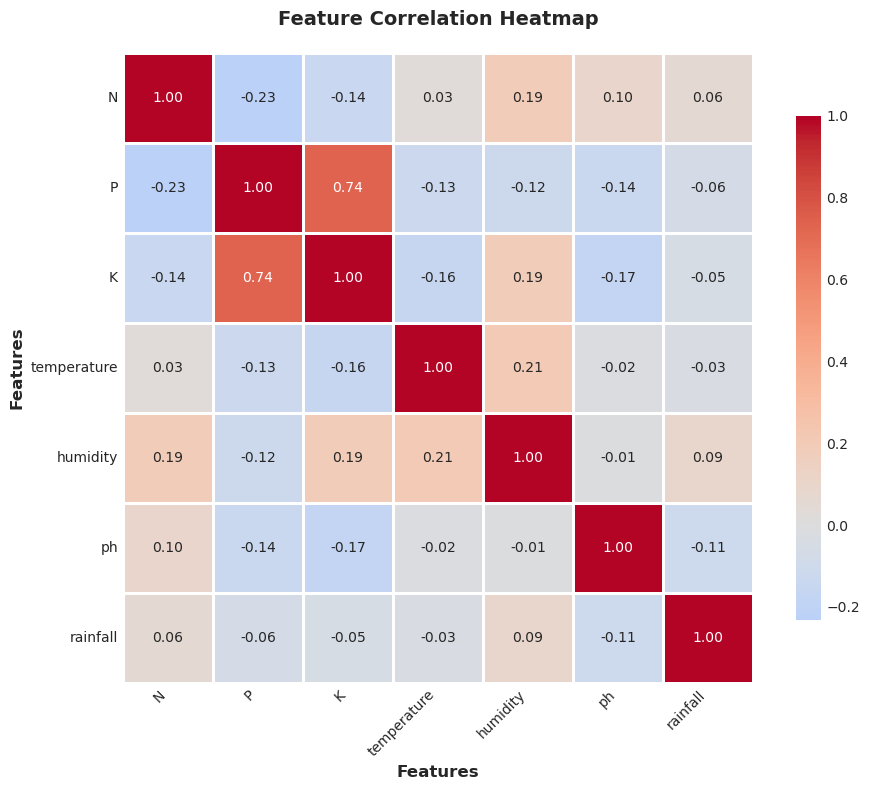

Visualization saved as 'images/correlation_heatmap.png'


In [15]:
# Visualize correlation matrix with heatmap
plt.figure(figsize=(10, 8))

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})

plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Features', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.savefig('images/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("Visualization saved as 'images/correlation_heatmap.png'")

### 6.5 Feature Relationships with Target

Let's visualize how different features vary across crop types.

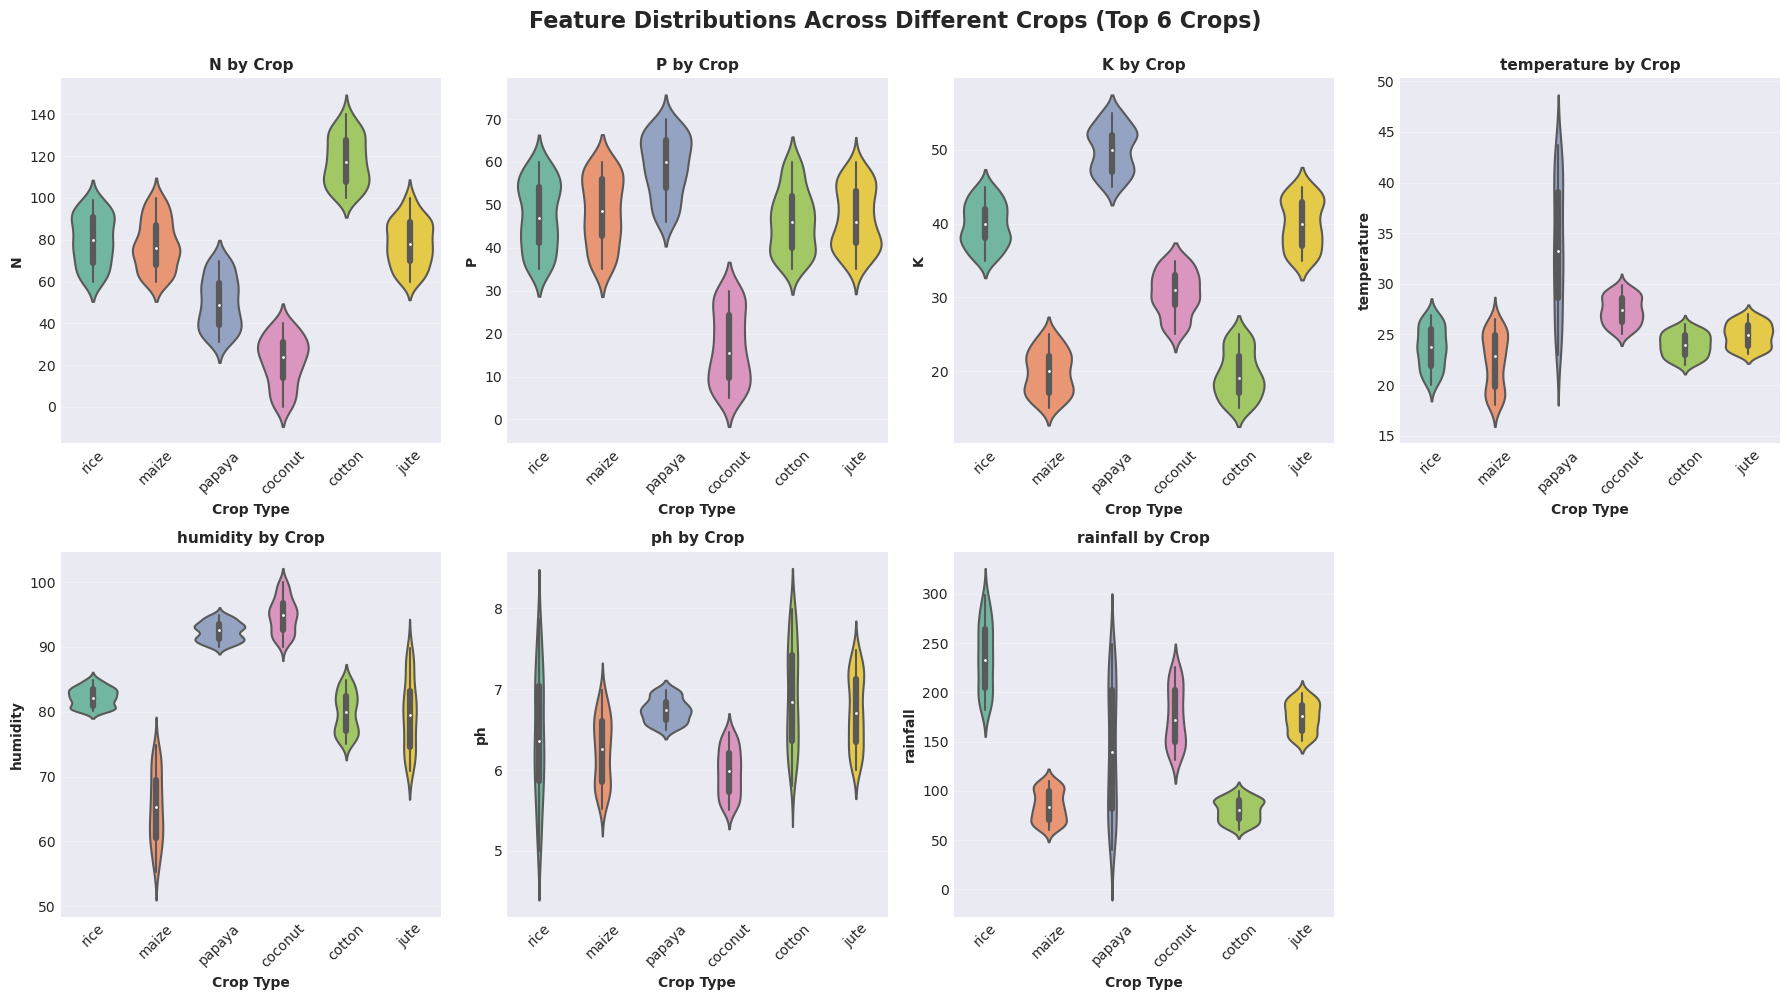

Visualization saved as 'images/features_by_crop.png'


In [16]:
# Select a few representative crops for cleaner visualization
top_crops = df['label'].value_counts().head(6).index

# Create violin plots showing feature distributions for different crops
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
fig.suptitle('Feature Distributions Across Different Crops (Top 6 Crops)', 
             fontsize=16, fontweight='bold', y=0.995)

for idx, feature in enumerate(features):
    row = idx // 4
    col = idx % 4
    ax = axes[row, col]
    
    # Filter data for top crops
    df_filtered = df[df['label'].isin(top_crops)]
    
    # Create violin plot
    sns.violinplot(data=df_filtered, x='label', y=feature, ax=ax, palette='Set2')
    
    ax.set_xlabel('Crop Type', fontsize=10, fontweight='bold')
    ax.set_ylabel(feature, fontsize=10, fontweight='bold')
    ax.set_title(f'{feature} by Crop', fontsize=11, fontweight='bold')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', alpha=0.3)

# Remove empty subplot
axes[1, 3].remove()

plt.tight_layout()
plt.savefig('images/features_by_crop.png', dpi=300, bbox_inches='tight')
plt.show()

print("Visualization saved as 'images/features_by_crop.png'")

### 6.6 Pair Plot (Relationships Between Features)

A pair plot shows relationships between all pairs of features. This helps identify patterns and clusters.

**Note:** This may take a minute to generate as it creates many subplots.

Generating pair plot... (this may take a moment)


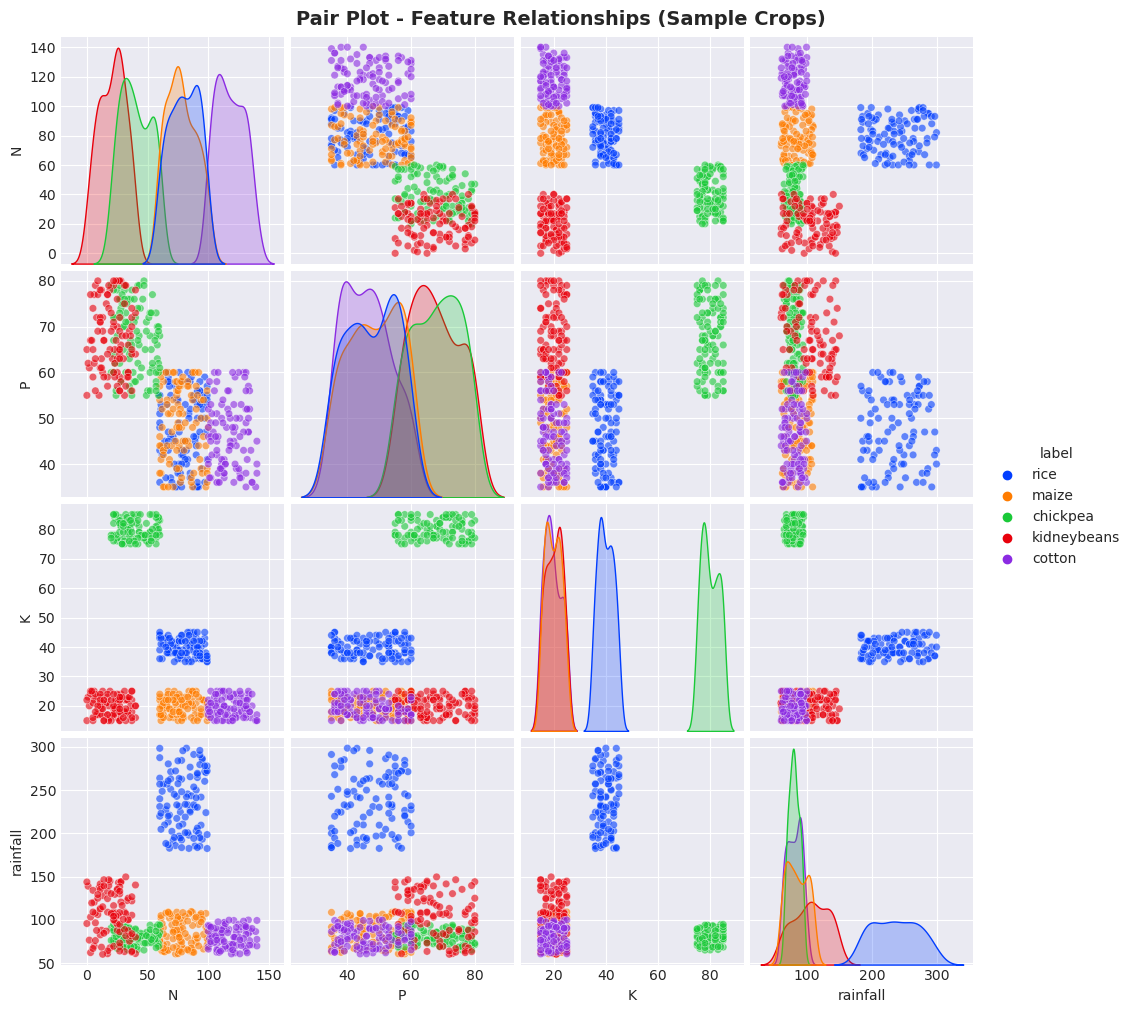

Visualization saved as 'images/pairplot_features.png'


In [17]:
# Create pair plot for a subset of features (to keep it manageable)
print("Generating pair plot... (this may take a moment)")

# Select 4 most important features for cleaner visualization
selected_features = ['N', 'P', 'K', 'rainfall']

# Sample crops for coloring (select 5 crops for clarity)
sample_crops = ['rice', 'maize', 'chickpea', 'kidneybeans', 'cotton']
df_sample = df[df['label'].isin(sample_crops)]

# Create pair plot
pairplot = sns.pairplot(df_sample[selected_features + ['label']], 
                         hue='label', 
                         diag_kind='kde',
                         palette='bright',
                         plot_kws={'alpha': 0.6, 's': 30},
                         height=2.5)

pairplot.fig.suptitle('Pair Plot - Feature Relationships (Sample Crops)', 
                      fontsize=14, fontweight='bold', y=1.01)

plt.savefig('images/pairplot_features.png', dpi=300, bbox_inches='tight')
plt.show()

print("Visualization saved as 'images/pairplot_features.png'")

## 7. Advanced Feature Analysis

Let's dig deeper into specific insights.

### 7.1 Feature Ranges by Crop

Understanding the optimal ranges for each crop helps validate model predictions later.

In [18]:
# Calculate feature ranges for each crop
print("-"*80)
print("Crop Feature Ranges (showing top 5 crops)")
print("-"*80)

top_5_crops = df['label'].value_counts().head(5).index

for crop in top_5_crops:
    crop_data = df[df['label'] == crop]
    print(f"\n{'-'*80}")
    print(f"Crop: {crop}")
    print(f"{'-'*80}")
    
    for feature in features:
        min_val = crop_data[feature].min()
        max_val = crop_data[feature].max()
        mean_val = crop_data[feature].mean()
        print(f"{feature:12} : Range [{min_val:7.2f}, {max_val:7.2f}]  |  Mean: {mean_val:7.2f}")

--------------------------------------------------------------------------------
Crop Feature Ranges (showing top 5 crops)
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
Crop: rice
--------------------------------------------------------------------------------
N            : Range [  60.00,   99.00]  |  Mean:   79.89
P            : Range [  35.00,   60.00]  |  Mean:   47.58
K            : Range [  35.00,   45.00]  |  Mean:   39.87
temperature  : Range [  20.05,   26.93]  |  Mean:   23.69
humidity     : Range [  80.12,   84.97]  |  Mean:   82.27
ph           : Range [   5.01,    7.87]  |  Mean:    6.43
rainfall     : Range [ 182.56,  298.56]  |  Mean:  236.18

--------------------------------------------------------------------------------
Crop: maize
--------------------------------------------------------------------------------
N            : Range [  60.00,  100.00]  

### 7.2 Feature Variability

Which features show the most variation? High variability means the feature is important for distinguishing crops.

------------------------------------------------------------
Feature Variability Analysis
------------------------------------------------------------

Coefficient of Variation (CV = std/mean * 100)
Higher CV indicates more variability

------------------------------------------------------------
    Feature  CV (%)
          K  105.19
          N   73.03
          P   61.81
   rainfall   53.12
   humidity   31.15
temperature   19.77
         ph   11.96


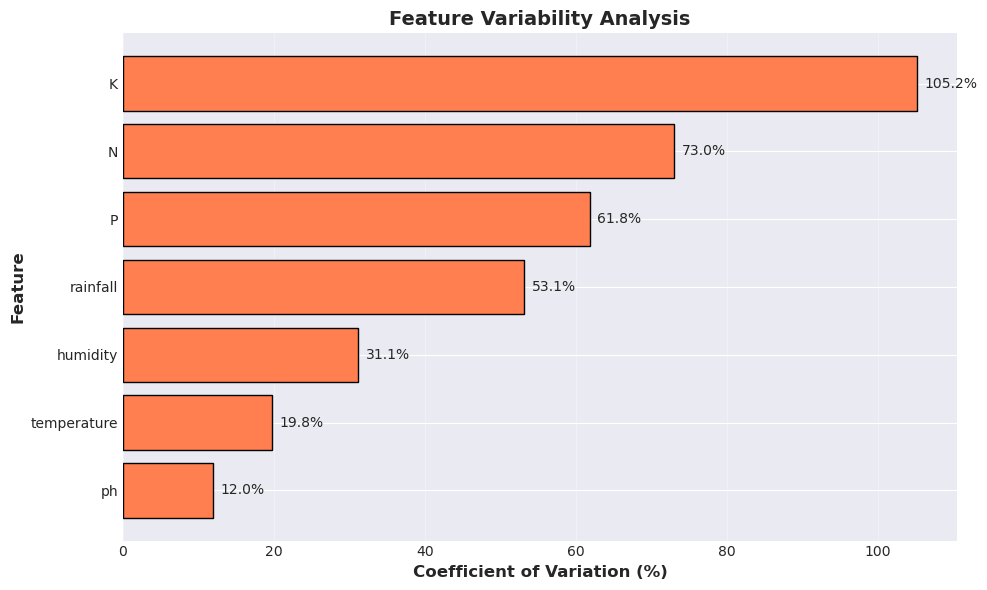


Visualization saved as 'images/feature_variability.png'


In [19]:
# Calculate coefficient of variation (CV) for each feature
print("-"*60)
print("Feature Variability Analysis")
print("-"*60)
print("\nCoefficient of Variation (CV = std/mean * 100)")
print("Higher CV indicates more variability\n")
print("-"*60)

cv_data = []
for feature in features:
    cv = (df[feature].std() / df[feature].mean()) * 100
    cv_data.append({'Feature': feature, 'CV (%)': cv})

cv_df = pd.DataFrame(cv_data).sort_values('CV (%)', ascending=False)
print(cv_df.to_string(index=False))

# Visualize
plt.figure(figsize=(10, 6))
plt.barh(cv_df['Feature'], cv_df['CV (%)'], color='coral', edgecolor='black')
plt.xlabel('Coefficient of Variation (%)', fontsize=12, fontweight='bold')
plt.ylabel('Feature', fontsize=12, fontweight='bold')
plt.title('Feature Variability Analysis', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.gca().invert_yaxis()

for i, v in enumerate(cv_df['CV (%)']):
    plt.text(v + 1, i, f'{v:.1f}%', va='center', fontsize=10)

plt.tight_layout()
plt.savefig('images/feature_variability.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nVisualization saved as 'images/feature_variability.png'")

## 8. Key Insights and Summary

all the findings can be found at the **Complete Data Exploration Report:**[Google Document Report](https://docs.google.com/document/d/1JgRRkWppcerf-53bgQMkoRYI0CVWU83J/edit?usp=sharing&ouid=114598965992781677318&rtpof=true&sd=true)